In [1]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import torch
from tqdm.notebook import tqdm
import numpy as np

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dir = r'/content/drive/MyDrive/CSE4214/Project/prothom_alo_punctuation_balanced.txt'

In [5]:
my_file = open(dir, "r")
data = my_file.read()
sentences = data.split("\n")
my_file.close()

print(sentences[0])

এই মুহূর্তে এই ধ্বনিতেই উচ্চকিত ফুটবল বিশ্ব।


In [6]:
filtered_sentences = [sentence for sentence in sentences if len(sentence.split()) <= 50 and len(sentence.split()) > 4]
len(filtered_sentences)

361099

In [7]:
import re

def contains_english_characters(text):
    english_pattern = re.compile(r'[a-zA-Z]')
    return bool(english_pattern.search(text))

def filter_bengali_sentences(sentences):
    filtered_sentences = [sentence for sentence in sentences if not contains_english_characters(sentence)]
    return filtered_sentences

bengali_sentences = filtered_sentences
print(len(bengali_sentences))
fs = filter_bengali_sentences(bengali_sentences)
print(len(fs))



361099
355857


In [ ]:
sentences = fs[:50000]
print(len(sentences))

last_characters = [sentence[-1] for sentence in sentences]

bengali_punctuation_dict = {"।": "", ",": "", "?": "", "!": "", ";": "", ":": "", "—": " "}

translator = str.maketrans(bengali_punctuation_dict)

cleaned_sentences = [sentence.translate(translator) for sentence in sentences]

labels = []
for char in last_characters:
    if char == '।':
        labels.append('Period')
    elif char == '?':
        labels.append('Question')
    elif char == '!':
        labels.append('Exclamatory')

data = {'Sentence': cleaned_sentences, 'Punc': labels}

df = pd.DataFrame(data)

df.head(10)

50000


,Sentence,Punc
0,এই মুহূর্তে এই ধ্বনিতেই উচ্চকিত ফুটবল বিশ্ব,Period
1,এক আসর থেকে আর কি-ই বা চাওয়া থাকতে পারে ২১ বছ...,Exclamatory
2,কথাটা নিজের মুখেই বলেছেন নেইমার,Period
3,তিনি বলেন ‘যারা সেনাবাহিনীর বিরুদ্ধে অপপ্রচার ...,Question
4,প্রায় ৪৫ গজ দূর থেকে নেওয়া শটে করেছেন লক্ষ্য...,Exclamatory
5,গত ক্লাব বিশ্বকাপের পর আবার একসঙ্গে মাঠে দেখা ...,Period
6,৪৫ গজ দূর থেকে নেইমার হঠাত্ এমন শট নিলেন কেউ ক...,Exclamatory
7,উরুগুইয়ান গোলরক্ষক ফার্নান্দো মুসলেরা চেষ্টা ...,Period
8,রূপকথার গল্প তো মানুষ এমনিতেই বেশি পছন্দ করে,Exclamatory
9,তাহলে প্রকাশিত হওয়ার পর ওই নিবন্ধনের সমর্থনে ...,Question


In [ ]:
df['word_count'] = df['Sentence'].apply(lambda x: len(x.split()))
df.head(10)

,Sentence,Punc,word_count
0,এই মুহূর্তে এই ধ্বনিতেই উচ্চকিত ফুটবল বিশ্ব,Period,7
1,এক আসর থেকে আর কি-ই বা চাওয়া থাকতে পারে ২১ বছ...,Exclamatory,13
2,কথাটা নিজের মুখেই বলেছেন নেইমার,Period,5
3,তিনি বলেন ‘যারা সেনাবাহিনীর বিরুদ্ধে অপপ্রচার ...,Question,15
4,প্রায় ৪৫ গজ দূর থেকে নেওয়া শটে করেছেন লক্ষ্য...,Exclamatory,10
5,গত ক্লাব বিশ্বকাপের পর আবার একসঙ্গে মাঠে দেখা ...,Period,13
6,৪৫ গজ দূর থেকে নেইমার হঠাত্ এমন শট নিলেন কেউ ক...,Exclamatory,17
7,উরুগুইয়ান গোলরক্ষক ফার্নান্দো মুসলেরা চেষ্টা ...,Period,10
8,রূপকথার গল্প তো মানুষ এমনিতেই বেশি পছন্দ করে,Exclamatory,8
9,তাহলে প্রকাশিত হওয়ার পর ওই নিবন্ধনের সমর্থনে ...,Question,13


In [ ]:
#df = df.loc[df['word_count'] <= 50]

In [ ]:
df['Punc'].nunique()

3

In [ ]:
mean_length = df['word_count'].mean()
median_length = df['word_count'].median()
std_deviation = df['word_count'].std()

print("Mean Sentence Length:", mean_length)
print("Median Sentence Length:", median_length)
print("Standard Deviation of Sentence Lengths:", std_deviation)


Mean Sentence Length: 10.72038
Median Sentence Length: 9.0
Standard Deviation of Sentence Lengths: 5.460303009337401


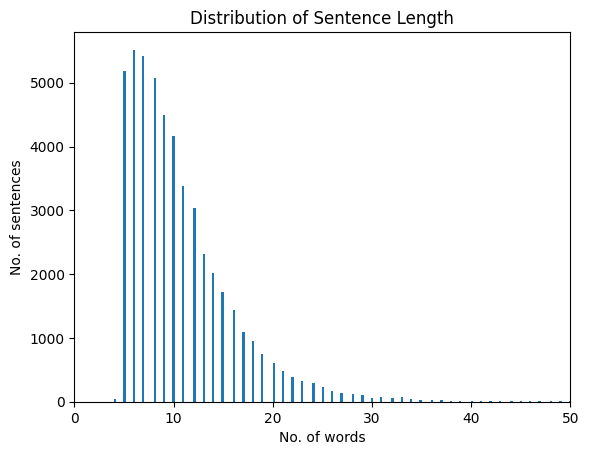

In [ ]:
import matplotlib.pyplot as plt

plt.xlim(xmin=0, xmax = 50)
plt.hist(df['word_count'], bins=200)
plt.xlabel("No. of words")
plt.ylabel("No. of sentences")
plt.title("Distribution of Sentence Length")
plt.show()

<ipython-input-12-43b81f2c0897>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  ax = sns.kdeplot(x, shade=False, color='crimson')


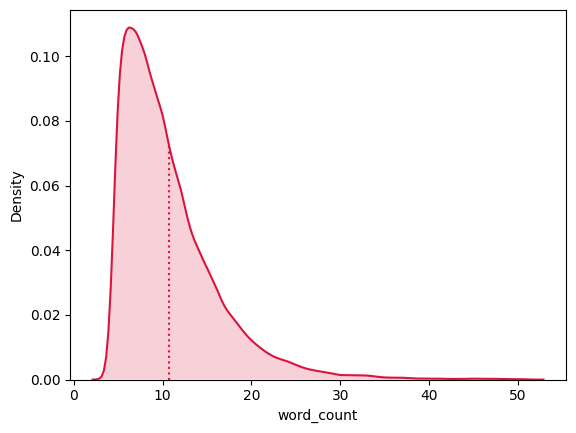

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x = df['word_count']
ax = sns.kdeplot(x, shade=False, color='crimson')
kdeline = ax.lines[0]
mean = x.mean()
xs = kdeline.get_xdata()
ys = kdeline.get_ydata()
height = np.interp(mean, xs, ys)
ax.vlines(mean, 0, height, color='crimson', ls=':')
ax.fill_between(xs, 0, ys, facecolor='crimson', alpha=0.2)
plt.show()


In [ ]:
possible_labels = df.Punc.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

In [ ]:
df['label'] = df.Punc.replace(label_dict)
df.head(10)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                  df.label.values,
                                                  test_size=0.15,
                                                  random_state=42,
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df.groupby(['Punc', 'label', 'data_type']).count()

Sentence  word_count
Punc        label data_type                      
Exclamatory 1     train         13947       13947
                  val            2461        2461
Period      0     train         14389       14389
                  val            2539        2539
Question    2     train         14164       14164
                  val            2500        2500

In [ ]:
df.loc[df['data_type'] == 'tes']

In [ ]:
#mod
from sklearn.model_selection import train_test_split

x_train_1, x_test, y_train_1, y_test = train_test_split(df.index.values,
                                                  df.label.values,
                                                  test_size=0.20,
                                                  random_state=42,
                                                  stratify=df.label.values)

X_train, X_val, y_train, y_val = train_test_split(x_train_1,
                                                  y_train_1,
                                                  test_size=0.20,
                                                  random_state=42,
                                                  stratify=y_train_1)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'
df.loc[x_test, 'data_type'] = 'test'

df.groupby(['Punc', 'label', 'data_type']).count()

Sentence  word_count
Punc        label data_type                      
Exclamatory 1     test           3282        3282
                  train         10501       10501
                  val            2625        2625
Period      0     test           3385        3385
                  train         10834       10834
                  val            2709        2709
Question    2     test           3333        3333
                  train         10665       10665
                  val            2666        2666

In [ ]:
tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base', do_lower_case=True)

encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].Sentence.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=50,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].Sentence.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=50,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    df[df.data_type=='test'].Sentence.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=50,
    return_tensors='pt'
)

input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(df[df.data_type=='test'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2393: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
len(dataset_train), len(dataset_val), len(dataset_test)

(32000, 8000, 10000)

In [ ]:
model = BertForSequenceClassification.from_pretrained("sagorsarker/bangla-bert-base",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 8

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

dataloader_test = DataLoader(dataset_test,
                            sampler=SequentialSampler(dataset_test),
                            batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')


In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)


def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals


cuda


In [ ]:
for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'/content/drive/MyDrive/CSE4214/Project/finetuned_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.566240019839257
Validation loss: 0.5773802149184049
F1 Score (Weighted): 0.7612383815638384


Epoch 2:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.43877092621917835
Validation loss: 0.650622395469807
F1 Score (Weighted): 0.7526683298683342


Epoch 3:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.33626951310690495
Validation loss: 0.843293269405025
F1 Score (Weighted): 0.7428982868765099


Epoch 4:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.2610919109462047
Validation loss: 1.2895552235935466
F1 Score (Weighted): 0.74818573730472


Epoch 5:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.18896789228651686
Validation loss: 1.6264658035457251
F1 Score (Weighted): 0.7408470057489467


Epoch 6:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.1296144795048458
Validation loss: 1.8801292103011364
F1 Score (Weighted): 0.7401096101507264


Epoch 7:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.08476398815767151
Validation loss: 1.9875095222083328
F1 Score (Weighted): 0.7434144324380898


Epoch 8:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.056805240283791136
Validation loss: 2.1708053566832057
F1 Score (Weighted): 0.7414921922792697


Epoch 9:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.03706415331944049
Validation loss: 2.3464300091726926
F1 Score (Weighted): 0.7439434195164426


Epoch 10:   0%|          | 0/4000 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.025901048331988703
Validation loss: 2.375536266088741
F1 Score (Weighted): 0.746271175052411


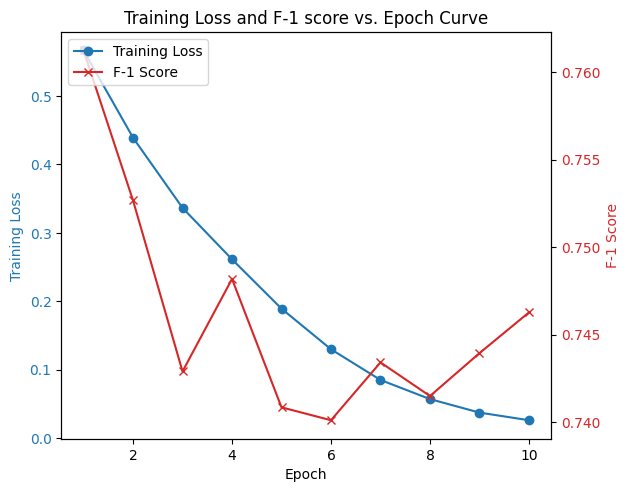

In [12]:
import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
loss_values = [0.566240019839257, 0.43877092621917835, 0.33626951310690495, 0.2610919109462047, 0.18896789228651686, 0.1296144795048458, 0.08476398815767151, 0.056805240283791136, 0.03706415331944049, 0.025901048331988703]
accuracy_values = [0.7612383815638384, 0.7526683298683342, 0.7428982868765099, 0.74818573730472, 0.7408470057489467, 0.7401096101507264, 0.7434144324380898, 0.7414921922792697, 0.7439434195164426, 0.746271175052411]

fig, ax1 = plt.subplots()

# Plotting Loss on the primary y-axis (left)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Training Loss', color='tab:blue')
ax1.plot(epochs, loss_values, marker='o', color='tab:blue', label='Training Loss')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Creating a secondary y-axis for Accuracy (right)
ax2 = ax1.twinx()
ax2.set_ylabel('F-1 Score', color='tab:red')
ax2.plot(epochs, accuracy_values, marker='x', color='tab:red', label='F-1 Score')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding legend for both lines from the two y-axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

fig.tight_layout()
plt.title('Training Loss and F-1 score vs. Epoch Curve')
plt.show()



In [ ]:
model = BertForSequenceClassification.from_pretrained("sagorsarker/bangla-bert-base",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/CSE4214/Project/finetuned_BERT_epoch_1.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
sen_r = ['ফাউল খেলবেন না—এটা কাদের উদ্দেশ্য করে বলছেন']
label_r = [2]
data_r = {'Sentence': sen_r, 'Punc': label_r}
df_r = pd.DataFrame(data_r)
df_r

,Sentence,Punc
0,ফাউল খেলবেন না—এটা কাদের উদ্দেশ্য করে বলছেন,2


In [ ]:
_, predictions, true_vals = evaluate(dataloader_test)

In [ ]:
accuracy_per_class(predictions, true_vals)

Class: Period
Accuracy: 2626/3385

Class: Exclamatory
Accuracy: 2051/3282

Class: Question
Accuracy: 2818/3333



In [ ]:
from sklearn.metrics import confusion_matrix
def con_mat_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return confusion_matrix(labels_flat, preds_flat)

In [ ]:
cm = con_mat_func(predictions, true_vals)
cm


array([[2626,  706,   53],
       [ 807, 2051,  424],
       [ 120,  395, 2818]])

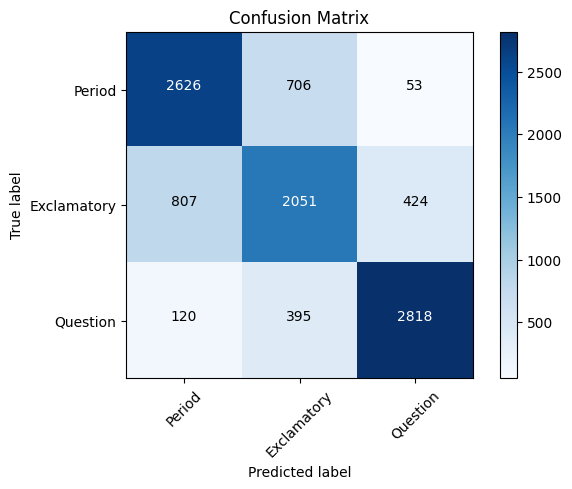

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

# Define the confusion matrix values
conf_matrix = np.array([[2626,  706,   53],
       [ 807, 2051,  424],
       [ 120,  395, 2818]])


# Define class labels
class_names = ['Period', 'Exclamatory', 'Question']

# Plot confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Add class labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Normalize the confusion matrix
#conf_matrix = conf_matrix.astype('int') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Display normalized values in the cells
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, "{:}".format(conf_matrix[i, j]),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [ ]:
import numpy as np

# Given confusion matrix
conf_matrix = np.array([[2626,  706,   53],
       [ 807, 2051,  424],
       [ 120,  395, 2818]])


# Calculate True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate accuracy
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics
for i, class_name in enumerate(['Class 0', 'Class 1', 'Class 2']):
    print(f"Metrics for {class_name}:")
    print(f"Accuracy: {accuracy[i]:.4f}")
    print(f"Precision: {precision[i]:.4f}")
    print(f"Recall: {recall[i]:.4f}")
    print(f"F1-score: {f1_score[i]:.4f}")
    print()


Metrics for Class 0:
Accuracy: 0.8314
Precision: 0.7391
Recall: 0.7758
F1-score: 0.7570

Metrics for Class 1:
Accuracy: 0.7668
Precision: 0.6507
Recall: 0.6249
F1-score: 0.6376

Metrics for Class 2:
Accuracy: 0.9008
Precision: 0.8552
Recall: 0.8455
F1-score: 0.8503



In [ ]:
import numpy as np

# Given confusion matrix
conf_matrix = np.array([[2626,  706,   53],
       [ 807, 2051,  424],
       [ 120,  395, 2818]])

# Calculate True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)
TP = np.diag(conf_matrix)
FP = np.sum(conf_matrix, axis=0) - TP
FN = np.sum(conf_matrix, axis=1) - TP
TN = np.sum(conf_matrix) - (TP + FP + FN)

# Calculate accuracy
accuracy = (TP + TN) / np.sum(conf_matrix)

# Calculate precision
precision = TP / (TP + FP)

# Calculate recall
recall = TP / (TP + FN)

# Calculate F1-score
f1_score = 2 * (precision * recall) / (precision + recall)

# Calculate overall metrics
overall_accuracy = np.mean(accuracy)
overall_precision = np.mean(precision)
overall_recall = np.mean(recall)
overall_f1_score = np.mean(f1_score)

# Print the overall metrics
print("Overall Metrics:")
print(f"Overall Accuracy: {overall_accuracy:.4f}")
print(f"Overall Precision: {overall_precision:.4f}")
print(f"Overall Recall: {overall_recall:.4f}")
print(f"Overall F1-score: {overall_f1_score:.4f}")


Overall Metrics:
Overall Accuracy: 0.8330
Overall Precision: 0.7483
Overall Recall: 0.7487
Overall F1-score: 0.7483


In [ ]:
import torch
import torch.nn.functional as F


In [ ]:
df_for_test = df.loc[df['data_type'] == 'test']
df_for_test.head(100)

,Sentence,Punc,word_count,label,data_type
1,এক আসর থেকে আর কি-ই বা চাওয়া থাকতে পারে ২১ বছ...,Exclamatory,13,1,test
2,কথাটা নিজের মুখেই বলেছেন নেইমার,Period,5,0,test
15,এত কষ্ট করে ভোট দিতে এলেন,Question,6,2,test
18,আগের দিন ওয়েস্ট ইন্ডিজের সঙ্গে লড়াই করে হেরে...,Period,11,0,test
22,২৫ রানে জয়াবর্ধনের ক্যাচ ফেলেছিলেন মুরালি বিজয়,Period,7,0,test
...,...,...,...,...,...
436,৫৬. ক্রিয়া বর্তমানে অতীতে বা ভবিষ্যতে সম্পন্ন...,Question,12,2,test
439,মান্ডেলা নাকি বলেছেন ‘একটা পন্ডো নাকি পোশাক ডি...,Exclamatory,9,1,test
451,তিনি আরও বলেন ‘তবে আমার প্রশ্ন হলো “ওয়াশিংটন ...,Question,19,2,test
455,অনুশীলন শেষে এক সাংবাদিকের কাছে জাহিদ জানতে চা...,Question,12,2,test


In [ ]:
device = 'cpu'
#device('cuda' if torch.cuda.is_available() else 'cpu')


print(device)

tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base', do_lower_case=True)
model = BertForSequenceClassification.from_pretrained("sagorsarker/bangla-bert-base",
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(device)
model.load_state_dict(torch.load('/content/drive/MyDrive/CSE4214/Project/finetuned_BERT_epoch_10.model', map_location=torch.device('cpu')))

input_sentence = "এত কষ্ট করে ভোট দিতে এলেন"
tokens = tokenizer(input_sentence, return_tensors='pt', padding=True, truncation=True, max_length=50)

print(tokens)

model.eval()

with torch.no_grad():
    outputs = model(**tokens)

logits = outputs[0]
softmaxed = F.softmax(logits, dim=1)
predicted_class = torch.argmax(softmaxed, dim=1).item()

print(logits)
print(softmaxed)
print(predicted_class)

if predicted_class == 0:
  output_sentence = input_sentence + '।'

elif predicted_class == 1:
  output_sentence = input_sentence + '!'
else:
  output_sentence = input_sentence + '?'



print(output_sentence)

cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'input_ids': tensor([[  101,  2592, 36470,  4804,  2039, 16137, 21327,  2176,  7280,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}
tensor([[-4.4537, -3.1460,  8.0389]])
tensor([[3.7545e-06, 1.3882e-05, 9.9998e-01]])
2
এত কষ্ট করে ভোট দিতে এলেন?
